# Monte-Carlo Options 

On se propose ici d'appliquer le modèle de Black-Sholes pour modéliser le prix d'un call européen. Ensuite nous utiliserons une méthode numérique pour simuler le prix d'un call européen. Pour cela, nous utiliserons la méthode de Monte Carlo.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from numpy import random

from scipy import stats

from  math import log, sqrt, exp

Cellule pour la déclaration des variables:

In [2]:
#Déclaration des variables
r= 0.05 # taux sans risque
Sig=0.2 # volatilité
K=100 # prix de l'action au bout de T, prix d'exercice, arbitraire (dollars)
Smin=80 # (dollars)
Smax=120 # (dollars)
nb_valeur_S0=50
T=[0.1,0.5,0.8,1] # valeur de Maturité T en années

T_MC = 1
K_MC=100 # prix d'exercice pour vérifier le modèle de Monte Carlo (dollards)
S_MC=100 # prix S_0 (dollars)
# Nombre de variables aléatoires à simuler
nb_variable_alea=[100, 150, 200, 300, 400, 500, 700, 800, 1000, 1200, 1800, 2500, 3500, 5000, 6000, 7500, 8500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 35000, 45000, 50000, 65000, 75000, 85000, 100000]
sim = 1000
n_iteration=100 # nombre de fois qu'on simule des paquets de n variables
n_binomial = 1000
nb_iteration_binomial = np.linspace(10, 1000, 50)
alpha=0.05

# 1) Pour différentes valeurs de T, tracer le prix du call européen de maturité T obtenu par la formule de Black & Scholes en fonction de S0.


On implémente la formule de Black and Scholes

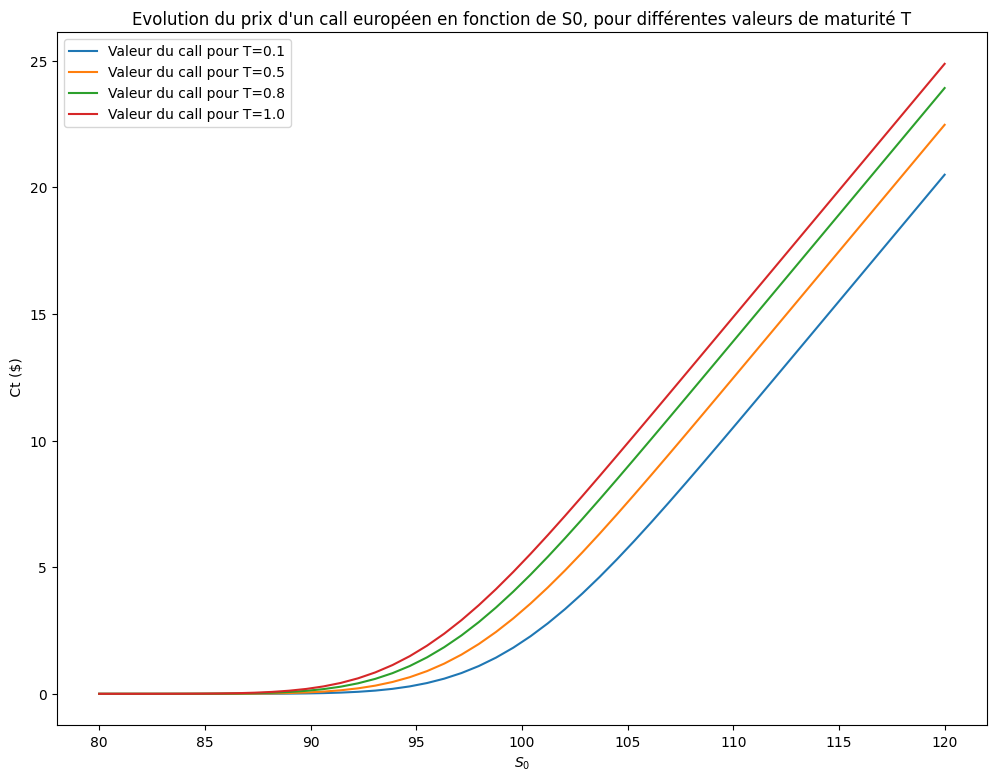

In [3]:
#Prix Ct d'un call européen d'après la formule de B&S
def Ct(S, K, T, r, Sig):
  d1= (np.log(S/K) + (r+(Sig**2)/2)*T)/(Sig*np.sqrt(T))

  d2= d1 - Sig*np.sqrt(T)

  Phi=stats.norm.cdf

  return S*Phi(d1, loc=0, scale=1)-K*np.exp(-r*T)*Phi(d2, loc=0, scale=1)

S0=np.linspace(Smin,Smax,nb_valeur_S0)

# calcul et affichage des prix Ct en fonction  et S0
plt.figure(figsize=(12, 9))
list_calls=[]
for time in T:

  calls=Ct(S0, K, r, time, Sig)

  plt.plot(S0, calls, label=f'Valeur du call pour T={time:.1f}')
  plt.xlabel('$S_0$')
  plt.ylabel(' Ct ($)')
  plt.title('Evolution du prix d\'un call européen en fonction de S0, pour différentes valeurs de maturité T')
  plt.legend()
  list_calls=[]


On a tracé le prix d'un call européen par la formule de Black and Scholes en fonction de $S_{0}$, pour différentes maturités T

*   On observe que la courbe avec la maturité la plus élévée se trouve au dessus des autres. Ce qui implique que plus le temps d'échéance est lointaine, plus la valeur du call est importante.

*  Pour toute maturité, le prix du call est une fonction croissante de $S_{0}$. Cela est logique car plus le prix de l'action ($S_{0}$) est important, plus la probabilité que d'êtrs supérieur au prix d'exercice est élévée ($K$), d'être *in the money*.






# 2) Convergence monte Carlo prix call européen

In [4]:
list_cn=[]
list_cn_moy=[]
list_s=[]
list_IC=[]


def monte_carlo_call_european(S, K, T, r, Sig, nb_simu):
    x = np.random.normal(0, 1, nb_simu)

    Phi = S * np.exp((r- (Sig**2)/2)*T + Sig *sqrt(T)* x)

    payoff = np.maximum(Phi - K, 0)

    call_price = np.exp(-r * T) * np.mean(payoff)

    return call_price

for sim in nb_variable_alea:
  for j in range(n_iteration):

    list_cn.append(monte_carlo_call_european(S_MC, K_MC,T_MC,r,Sig,sim))

  cn_moy = np.round(np.sum(list_cn)/len(list_cn), 2)
  list_cn_moy.append(cn_moy)

  s_cn= np.round(np.var(list_cn), 4)

  list_s.append(s_cn)
  t_value = stats.t.ppf(1-alpha/2, df=len(list_cn) - 1 ) # calcul le t de la loi de student pour un intervalle de conf à 95 %
  list_IC.append([np.round(cn_moy-t_value*sqrt(s_cn/len(list_cn)), 4), np.round(cn_moy+t_value*sqrt(s_cn/len(list_cn)), 4)])
  list_cn=[]


#dataframe pour avoir une vue globale
data = np.array([nb_variable_alea, list_cn_moy, list_s, list_IC]).T
columns = ["n","Call Price", "Variance", "IC"]
results = pd.DataFrame(data, columns = columns)
print(results)


         n Call Price Variance                  IC
0      100      10.48   2.2637  [10.1815, 10.7785]
1      150      10.49   1.4792  [10.2487, 10.7313]
2      200      10.42   0.9987  [10.2217, 10.6183]
3      300      10.52    0.878  [10.3341, 10.7059]
4      400      10.39   0.5663  [10.2407, 10.5393]
5      500      10.44   0.4527  [10.3065, 10.5735]
6      700      10.55   0.2747    [10.446, 10.654]
7      800      10.44   0.2621  [10.3384, 10.5416]
8     1000      10.48    0.239    [10.383, 10.577]
9     1200      10.39   0.2146  [10.2981, 10.4819]
10    1800       10.5   0.1196  [10.4314, 10.5686]
11    2500      10.47    0.069  [10.4179, 10.5221]
12    3500      10.45   0.0609    [10.401, 10.499]
13    5000      10.47   0.0512  [10.4251, 10.5149]
14    6000      10.44   0.0377  [10.4015, 10.4785]
15    7500      10.45   0.0335  [10.4137, 10.4863]
16    8500      10.48   0.0221  [10.4505, 10.5095]
17   10000      10.45   0.0217  [10.4208, 10.4792]
18   12500      10.45   0.0142 

<ipython-input-4-a28e9995da9c>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([nb_variable_alea, list_cn_moy, list_s, list_IC]).T


# 2)3) Illustration de la convergence pour le prix du Call européen

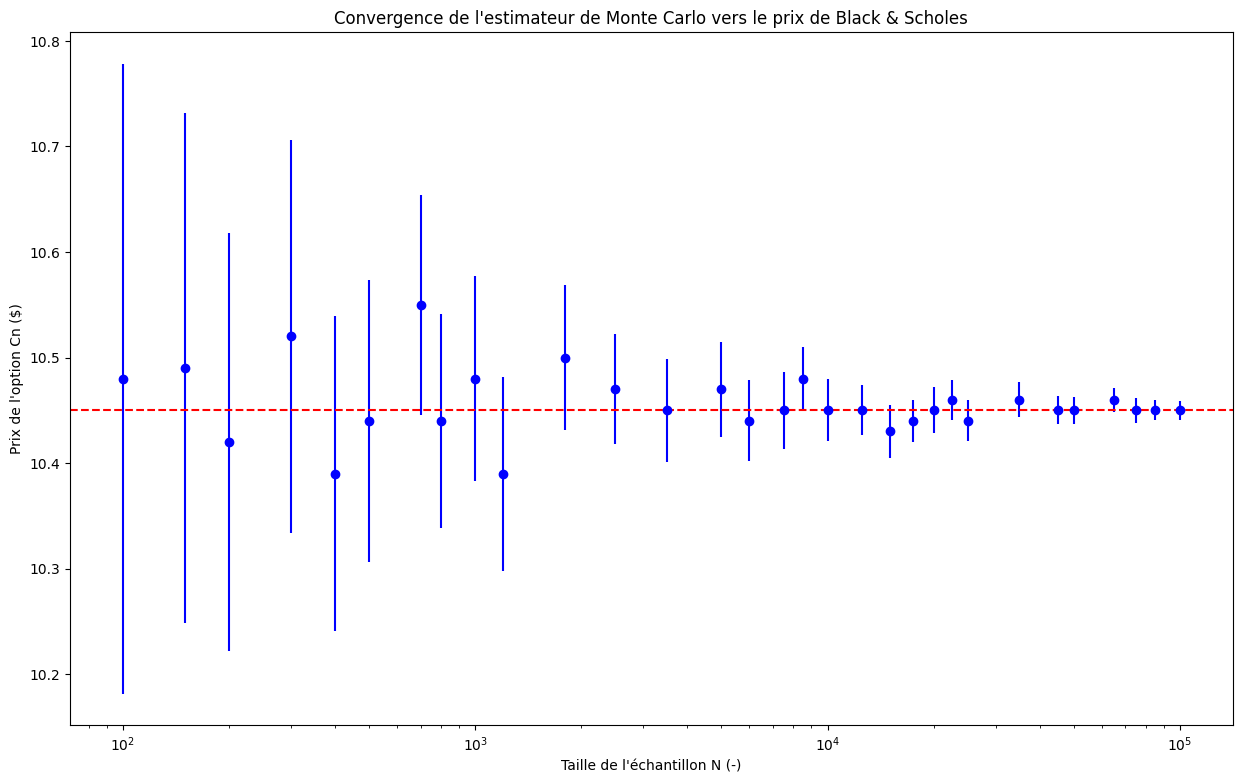

In [5]:
plt.figure(figsize=(15, 9))
for i in range(len(nb_variable_alea)):
    plt.errorbar(nb_variable_alea[i], list_cn_moy[i], yerr=abs(list_cn_moy[i]-list_IC[i][0]), color='blue', fmt='o')

plt.axhline(y=Ct(S_MC, K_MC, T_MC, r, Sig), color='red', linestyle='--')

plt.xlabel('Taille de l\'échantillon N (-)')
plt.ylabel('Prix de l\'option Cn ($)')
plt.title('Convergence de l\'estimateur de Monte Carlo vers le prix de Black & Scholes')
plt.xscale('log')
plt.show()

On a tracé le convergence de l'estimateur de Monte Carlo vers le prix Black and Scholes pour $K=100$ et $S_{0}$=100 (ligne rouge en pointillés).



*   Plus le nombre de variable aléatoire augmente, plus on se rapproche du prix B&S. Cela est prévisible, d'après la loi des grands nombres, qui stipule que la moyenne des résultats obtenus à partir d'un grand nombre de tirages indépendants devrait être proche de la valeur attendue. Aux alentours de N=6000, on commence à être très proche de Ct.




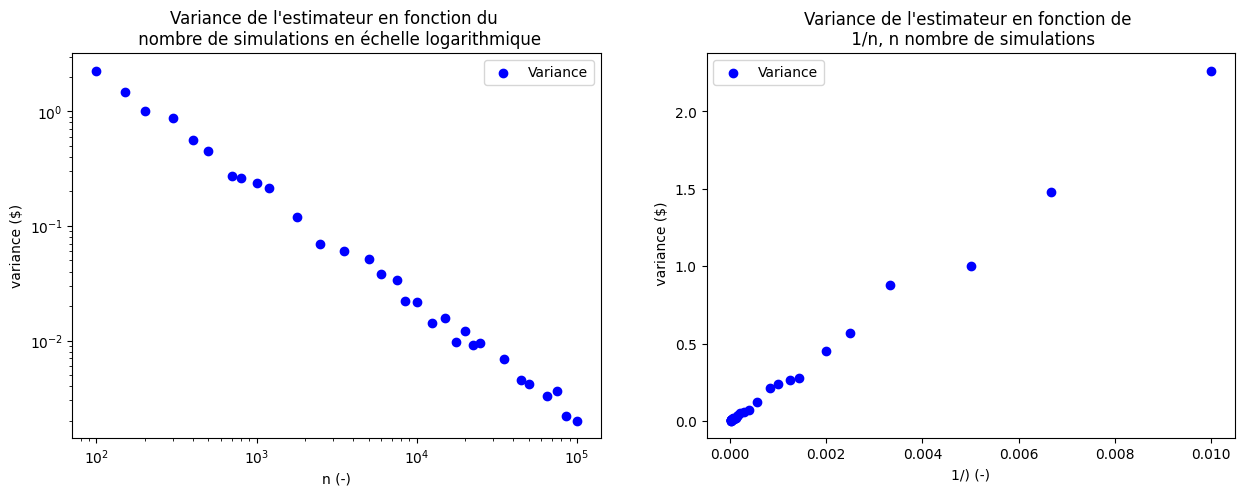

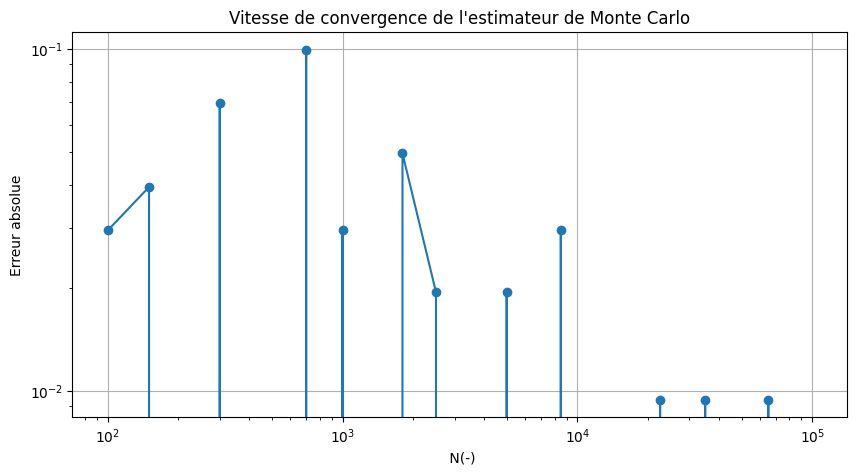

In [6]:
inv_nb_simu=[]
for i in range(len(nb_variable_alea)):
  inv_nb_simu.append(1/(nb_variable_alea[i]))

residus = np.array(list_cn_moy) - Ct(S_MC, K_MC, T_MC, r, Sig)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(nb_variable_alea, list_s , color='b', label='Variance')
ax1.set_xlabel('n (-)')
ax1.set_ylabel('variance ($)')
ax1.set_title("Variance de l'estimateur en fonction du \n nombre de simulations en échelle logarithmique")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

ax2.scatter(inv_nb_simu, list_s, color='b' ,label='Variance')
ax2.set_xlabel('1/) (-)')
ax2.set_ylabel(' variance ($)')
ax2.set_title("Variance de l'estimateur en fonction de \n 1/n, n nombre de simulations")
ax2.legend()

plt.figure(figsize=(10, 5))
plt.loglog(nb_variable_alea, residus, marker='o', linestyle='-')
plt.xlabel(' N(-)')
plt.ylabel('Erreur absolue')
plt.title('Vitesse de convergence de l\'estimateur de Monte Carlo')
plt.grid(True)
plt.show()

plt.show()

On a tracé la variance en fonction du nombre de variables aléatoires en échelle log à gauche, à droite la variance en fonction de l'inverse du nombre de variables aléatoires.



*   On observe que l'on a une relation linéaire entre les deux graphes. La variance est une fonction linéaire et décroissante de N.
*   L'erreur (résidus) décroit en fonction de N avec une vitesse en $\frac{1}{\sqrt(N)}$, montrant la vitesse de convergence de l'estimateur de Monte Carlo en $\frac{1}{\sqrt(N)}$.



# 4) Illustrer la normalité asymptotique de l’estimateur de Monte Carlo.


On va utiliser un Q-Q plot ici pour vérifier la normalité de notre estimateur Monte Carlo

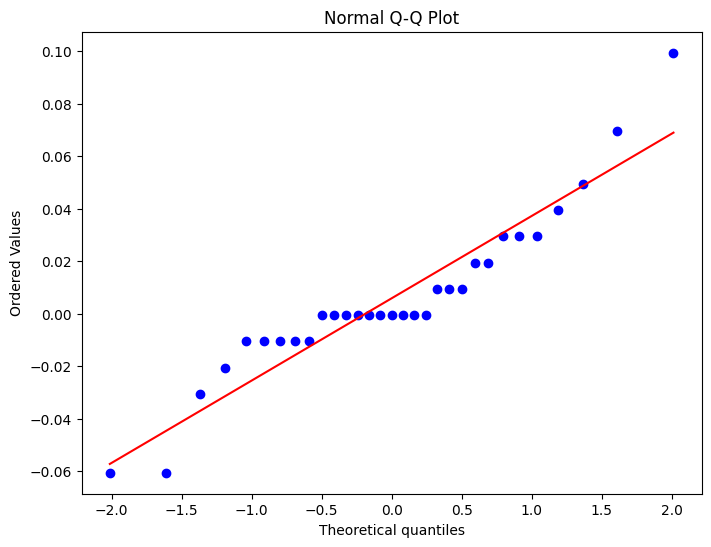

In [7]:
#Trace le Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residus, plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

Un plot quantile-quantile permet de déterminer si un ensemble de données pourrait suivre une distribution théorique, telle que la distribution normale.


On apperçoit sur notre Q-Q plot que:


*   La relation est plutôt linéaire, les points de données forment une ligne droite. Cela suggère que les résidus sont normalment distribués.

*   Cependant, on observe des écarts aux extrémités. Cela suggère que les résudus ont des queues de distribution plus importantes que la distribution normale. En d'autres termes, les valeurs extrèmes (abbérantes) sont mals modélisées par notre modèle


*   Les points centraux suivent bien la ligne rouge. Raisonnablement, on en déduit que la médiane et la dispersion des résidus sont cohérentes avec une distribution normale.


Finalement, les résidus de notre modèle sont approximativement distribués normalement, avec quelques valeurs extrèmes.

# 5) (Pour aller plus loin) Illustrer la convergence de prix du call européen dans le modèle binomial vers le prix Black & Scholes.

In [8]:
def binomial_call_pricing(S, K, T, r, sigma, n):

    delta_t = T / n
    u = exp(sigma * sqrt(delta_t))
    d = 1 / u
    p = (exp(r * delta_t) - d) / (u - d)

    option_prices = [0] * (n + 1)
    for i in range(n + 1):
        option_prices[i] = max(0, S * (u ** (n - i)) * (d ** i) - K)

    for j in range(n - 1, -1, -1):
        for i in range(j + 1):
            option_prices[i] = exp(-r * delta_t) * (p * option_prices[i] + (1 - p) * option_prices[i + 1])
    return option_prices[0]


Text(0.5, 1.0, "Prix de l'option du modèle binomial en fonction du nombre de noeuds de l'arbre")

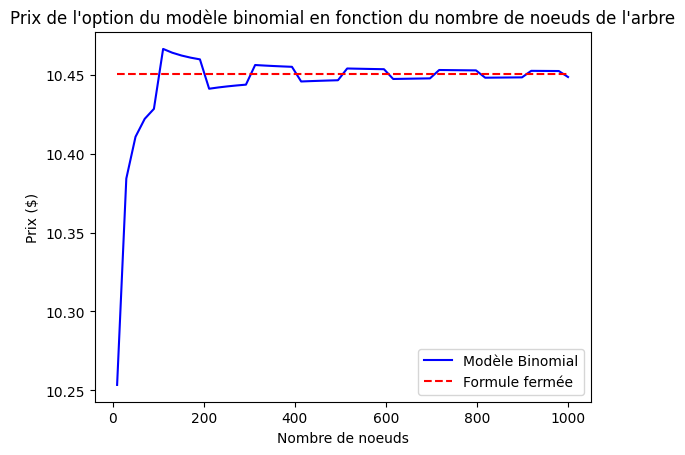

In [9]:
call = Ct(S_MC, K_MC, T_MC, r, Sig)
binomial_calls = np.zeros(len(nb_iteration_binomial))

for i, sim_bin in enumerate(nb_iteration_binomial):
    binomial_calls[i] = binomial_call_pricing(S_MC, K_MC, T_MC, r, Sig, int(sim_bin))


plt.plot(nb_iteration_binomial, binomial_calls, color='blue', label="Modèle Binomial")
plt.plot(nb_iteration_binomial, np.repeat(call, len(binomial_calls)), color='red', linestyle='--', label="Formule fermée")
plt.legend()
plt.ylabel("Prix ($)")
plt.xlabel("Nombre de noeuds")
plt.title("Prix de l'option du modèle binomial en fonction du nombre de noeuds de l'arbre")

# 6) (Pour aller plus loin) Comparer les performances de différentes implémentations Python de votre pricer Monte Carlo (listes, numpy array, boucles, etc.). On pourra utiliser %%timeit pour la comparaison.

In [10]:
def monte_carlo_call_european(S, K, T, r, Sig, nb_simu):
    x = np.random.normal(0, 1, nb_simu)
    Phi = S * np.exp((r- (Sig**2)/2)*T + Sig *sqrt(T)* x)
    payoff = np.maximum(Phi - K, 0)
    call_price = np.exp(-r * T) * np.mean(payoff)

    return call_price

def monte_carlo_call_european_list(S, K, T, r, Sig, nb_simu):
  x_list = []
  payoff_list=[]
  for n in range(nb_simu):
    noise = np.random.normal(0, 1)
    Phi = S * np.exp((r- (Sig**2)/2)*T + Sig *sqrt(T)* noise)
    payoff = np.maximum(Phi - K, 0)
    payoff_list.append(payoff)

  call_price = np.exp(-r * T) * np.mean(payoff_list)

  return call_price

def monte_carlo_call_european_list_worst(S, K, T, r, Sig, nb_simu):
  x_list = []
  payoff_list=[]
  for n in range(nb_simu):
    noise = np.random.normal(0, 1)
    Phi = S * np.exp((r- (Sig**2)/2)*T + Sig *sqrt(T)* noise)
    payoff = np.maximum(Phi - K, 0)
    payoff_list.append(payoff)

  sum = 0
  for i in range(len(payoff_list)):
    sum += payoff_list[i]
  mean = sum/len(payoff_list)

  call_price = np.exp(-r * T) * mean

  return call_price

In [11]:
%%timeit
monte_carlo_call_european(S_MC, K_MC, T_MC, r, Sig, sim)

5.03 ms ± 348 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%%timeit
monte_carlo_call_european_list(S_MC, K_MC, T_MC, r, Sig, sim)

717 ms ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
monte_carlo_call_european_list_worst(S_MC, K_MC, T_MC, r, Sig, sim)

459 ms ± 9.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Numpy permet d'accéérer de manière très importante le code. En effet,

- NumPy permet d'effectuer des opérations vectorisées, où des opérations sont appliquées simultanément à chaque élément d'un tableau. Cela évite le besoin de boucles explicites et accélère les calculs.

- NumPy est construit sur des bibliothèques C, ce qui signifie que de nombreuses opérations sont implémentées de manière optimisée au niveau bas niveau, ce qui se traduit par des performances plus rapides.

De plus, nous auriont pu utiliser d'autres bilbiothèques comme Numba qui est développé pour bien fonctionner avec Numpy. Numba est un compilateur JIT (Just in Time) qui permet de se rapprocher de la vitesse de C.